# simple case

('death rate:', 0.0)
('survival rate:', 100.0)


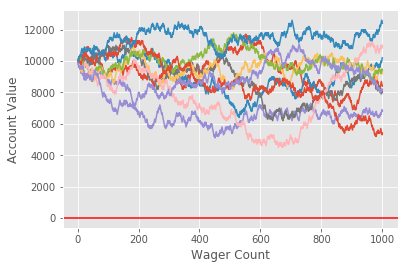

In [62]:
import random
import matplotlib
import matplotlib.pyplot as plt

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    global broke_count
    # wager X
    wX = []

    #value Y
    vY = []

    # change to 1, to avoid confusion so we start @ wager 1
    # instead of wager 0 and end at 100. 
    currentWager = 1

    #           change this to, less or equal.
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            # append #
            wX.append(currentWager)
            vY.append(value)
            
        else:
            value -= wager
            # append #
            wX.append(currentWager)
            vY.append(value)

            #for comparison to other stategies
            if value < 0:
                currentWager += 1000000000000
                broke_count += 1
            
        currentWager += 1
        
    #print 'Funds:', value

    plt.plot(wX,vY)
    


#x = 0

# start this off @ 1, then add, and increase 50 to 500, then 1000
#while x < 100:
#    simple_bettor(10000,100,10000)
#    x += 1

    
x = 0
broke_count = 0
while x < 10:             
    simple_bettor(10000,100,1000)
    x+=1
print(('death rate:',(broke_count/float(x)) * 100))
print(('survival rate:',100 - ((broke_count/float(x)) * 100)))
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()
    
    


# Martingale Strategy

we won the last wager, yay!
9900
we lost the last one, so we will be super smart & double up!
we lost 200
9700
we lost the last one, so we will be super smart & double up!
we won 400
10100
we won the last wager, yay!
10200
we won the last wager, yay!
10300
we won the last wager, yay!
10400
we won the last wager, yay!
10500
we won the last wager, yay!
10600
we won the last wager, yay!
10700
we won the last wager, yay!
10600
we lost the last one, so we will be super smart & double up!
we lost 200
10400
we lost the last one, so we will be super smart & double up!
we won 400
10800
we won the last wager, yay!
10900
we won the last wager, yay!
10800
we lost the last one, so we will be super smart & double up!
we lost 200
10600
we lost the last one, so we will be super smart & double up!
we won 400
11000
we won the last wager, yay!
11100
we won the last wager, yay!
11000
we lost the last one, so we will be super smart & double up!
we lost 200
10800
we lost the last one, so we will be super sm

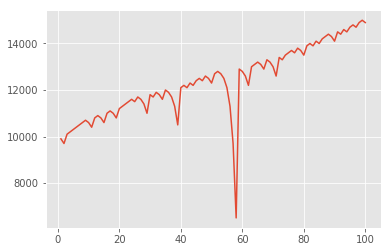

In [66]:
import random
import matplotlib
import matplotlib.pyplot as plt
#
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # since we'll be betting based on previous bet outcome #
    previousWager = 'win'

    # since we'll be doubling #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            print('we won the last wager, yay!')
            if rollDice():
                value += wager
                print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager  
                previousWager = 'loss'
                print(value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print('went broke after',currentWager,'bets')
                    break
        elif previousWager == 'loss':
            print('we lost the last one, so we will be super smart & double up!')
            if rollDice():
                wager = previousWagerAmount * 2
                print('we won',wager)
                value += wager
                print(value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                print('we lost',wager)
                value -= wager
                if value < 0:
                    print('went broke after',currentWager,'bets')
                    break
                print(value)
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    print('went broke after',currentWager,'bets')
                    break

        currentWager += 1

    print(value)
    plt.plot(wX,vY)

    
            
            
doubler_bettor(10000,100,100)
plt.show()
#time.sleep(555)




death rate: 30.0
survival rate: 70.0


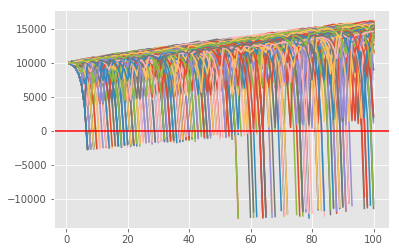

In [67]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    global broke_count
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # since we'll be betting based on previous bet outcome #
    previousWager = 'win'

    # since we'll be doubling #
    previousWagerAmount = initial_wager

    '''
    immediately with these comments, and our previous discussion of how previous outcomes
    do not affect future outcome possibilities, you should realize that this betting method
    offers nothing more than a quicker realization of losses or gains.

    Another way to visualize this quicker realization is actually an increase in risk.
    This bettor will experience extremely unpredictable volatility most likely. 
    '''

    while currentWager <= wager_count:
        if previousWager == 'win':
            ##print 'we won the last wager, yay!'
            if rollDice():
                value += wager
                ##print value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                ##print value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    ##print 'went broke after',currentWager,'bets'
                    broke_count += 1
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            ##print 'we lost the last one, so we will be super smart & double up!'
            if rollDice():
                wager = previousWagerAmount * 2
                ##print 'we won',wager
                value += wager
                ##print value
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                ##print 'we lost',wager
                value -= wager
                ##print value
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    ##print 'went broke after',currentWager,'bets'
                    currentWager += 10000000000000000
                    broke_count += 1

        currentWager += 1

    ##print value
    plt.plot(wX,vY)

    

xx = 0
broke_count = 0

while xx < 1000:             
    doubler_bettor(10000,100,100)
    xx+=1
    
print('death rate:',(broke_count/float(xx)) * 100)
print('survival rate:',100 - ((broke_count/float(xx)) * 100))
plt.axhline(0, color = 'r')
plt.show()

# what about X3?

death rate: 63.0
survival rate: 37.0


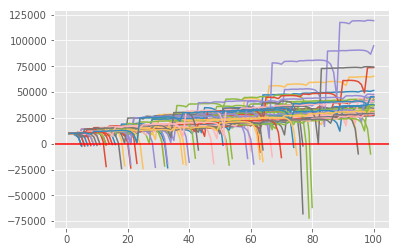

In [69]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    global broke_count
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # since we'll be betting based on previous bet outcome #
    previousWager = 'win'

    # since we'll be doubling #
    previousWagerAmount = initial_wager

    '''
    immediately with these comments, and our previous discussion of how previous outcomes
    do not affect future outcome possibilities, you should realize that this betting method
    offers nothing more than a quicker realization of losses or gains.

    Another way to visualize this quicker realization is actually an increase in risk.
    This bettor will experience extremely unpredictable volatility most likely. 
    '''

    while currentWager <= wager_count:
        if previousWager == 'win':
            ##print 'we won the last wager, yay!'
            if rollDice():
                value += wager
                ##print value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                ##print value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    ##print 'went broke after',currentWager,'bets'
                    broke_count += 1
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            ##print 'we lost the last one, so we will be super smart & double up!'
            if rollDice():
                wager = previousWagerAmount * 3
                ##print 'we won',wager
                value += wager
                ##print value
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 3
                ##print 'we lost',wager
                value -= wager
                ##print value
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    ##print 'went broke after',currentWager,'bets'
                    currentWager += 10000000000000000
                    broke_count += 1

        currentWager += 1

    ##print value
    plt.plot(wX,vY)

    

xx = 0
broke_count = 0

while xx < 100:             
    doubler_bettor(10000,100,100)
    xx+=1
    
print('death rate:',(broke_count/float(xx)) * 100)
print('survival rate:',100 - ((broke_count/float(xx)) * 100))
plt.axhline(0, color = 'r')
plt.show()

# visualisation for comparison

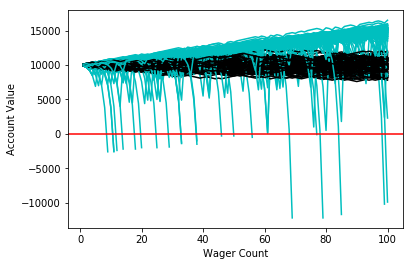

In [74]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time



sampleSize = 100

startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count,color):

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000

        currentWager += 1
    # this guy goes cyan #
    plt.plot(wX,vY,'c')

#####                                           color#
def simple_bettor(funds,initial_wager,wager_count,color):
    ####

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            ###add me
            if value < 0:
                currentWager += 10000000000000000
        currentWager += 1

    # this guy goes green #
    plt.plot(wX,vY,color)

    
x = 0

while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'k')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'c')
    x+=1

plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

# fix the debt issue, profits and losses

('Simple Bettor Bust Chances:', 0.0)
('Doubler Bettor Bust Chances:', 30.2)
('Simple Bettor Profit Chances:', 39.7)
('Doubler Bettor Profit Chances:', 64.5)


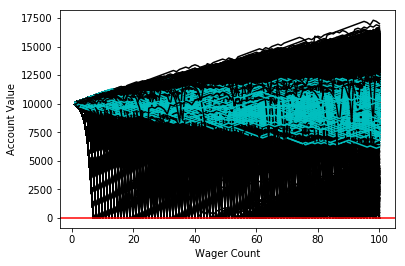

In [77]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

sampleSize = 1000
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True

def doubler_bettor(funds,initial_wager,wager_count,color):
    global doubler_busts
    #####################
    global doubler_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        doubler_profits+=1
        


'''
Simple bettor, betting the same amount each time.
'''

def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    #####################
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        simple_profits+=1

    
x = 0



simple_busts = 0.0
doubler_busts = 0.0

#####################
simple_profits = 0.0
doubler_profits = 0.0


while x < sampleSize:             
    simple_bettor(startingFunds,wagerSize,wagerCount,'c')
    #simple_bettor(startingFunds,wagerSize*2,wagerCount,'c')
    doubler_bettor(startingFunds,wagerSize,wagerCount,'k')
    x+=1



print(('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00))
print(('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00))

print (('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00))
print(('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00))
    

plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

# find the best multiple

In [79]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

lower_bust = 31.235
higher_profit = 63.208

# back to 1,000
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True



def multiple_bettor(funds,initial_wager,wager_count):#,color):

    #add
    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():

                #### must change the multiple ####
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    #change
                    multiple_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)
    #####################
    if value > funds:
        #change
        multiple_profits+=1
    
    


def doubler_bettor(funds,initial_wager,wager_count,color):
    global doubler_busts
    global doubler_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    #plt.plot(wX,vY,color)
    #####################
    if value > funds:
        doubler_profits+=1

def simple_bettor(funds,initial_wager,wager_count,color):
    global simpahle_busts
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    if value > funds:
        simple_profits+=1
x = 0

#Doubler Bettor Bust Chances: 84.1457... so anything less than this... aaaand
#Doubler Bettor Profit Chances: 15.6355 ... aaaand better than this.

while x < 10000:
    
    ######## move this stuff in here for the maths.
    multiple_busts = 0.0
    multiple_profits = 0.0
    # now we're wanting to do 100 attempts to get a good sample #
    multipleSampSize = 100000
    currentSample = 1
    
    random_multiple = random.uniform(0.1,10.0)
    #random_multiple = 2.00
    #print((random_multiple
    # adding this....
    while currentSample <= multipleSampSize:
        multiple_bettor(startingFunds,wagerSize,wagerCount)
        #add one to sample
        currentSample += 1

    if ((multiple_busts/multipleSampSize)*100.00 < lower_bust) and ((multiple_profits/multipleSampSize)*100.00 > higher_profit):
        print(('#################################################'))
        print(('found a winner, the multiple was:',random_multiple))
        print(('Lower Bust Rate Than:',lower_bust))
        print(('Higher profit rate than:',higher_profit))
        print(('Bust Rate:',(multiple_busts/multipleSampSize)*100.00))
        print(('Profit Rate:',(multiple_profits/multipleSampSize)*100.00))
        print(('#################################################'))
        time.sleep(5)
        #plt.show()
    else:
        pass
               

##        print(('####################################'))
##        print(('To beat:'))
##        print(('Lower Bust Rate Than:',lower_bust))
##        print(('Higher profit rate than:',higher_profit))
##        print(('Bust Rate:',(multiple_busts/multipleSampSize)*100.00))
##        print(('Profit Rate:',(multiple_profits/multipleSampSize)*100.00))
##        print(('####################################'))
##
##        #clears the figure
##        plt.clf()
        

    x+=1

#################################################
('found a winner, the multiple was:', 1.640067775609807)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 11.334)
('Profit Rate:', 65.94200000000001)
#################################################
#################################################
('found a winner, the multiple was:', 1.8235548456203787)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 20.717)
('Profit Rate:', 66.067)
#################################################
#################################################
('found a winner, the multiple was:', 1.613938724454623)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 10.355)
('Profit Rate:', 64.786)
#################################################
#################################################
('found a winner, the multiple was:', 1.6629362375404828)
('Lower Bust Rate Than:', 31.235)
('Higher profit ra

KeyboardInterrupt: 

# D'Alembert strategy in a 51-49% setting

In [12]:
# for plotting

#################################################
Lower Bust Rate Than: 31.235
Higher profit rate than: 63.208
Bust Rate: 10.0
Profit Rate: 90.0
#################################################


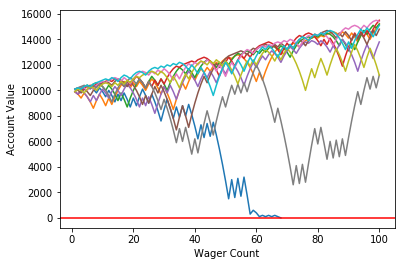

In [18]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

lower_bust = 31.235
higher_profit = 63.208

#lower_bust = 19.00
#higher_profit = 69.00

# back to 1,000
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True




def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    plt.plot(wX,vY)

    if value > funds:
        da_profits+=1




    


''' 
def multiple_bettor(funds,initial_wager,wager_count):#,color):

    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    multiple_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)

    if value > funds:
        multiple_profits+=1



def multiple_bettor2(funds,initial_wager,wager_count,multiple):#,color):

    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    multiple_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)

    if value > funds:
        multiple_profits+=1  
    


def doubler_bettor(funds,initial_wager,wager_count,color):
    global doubler_busts
    global doubler_profits
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    currentWager += 10000000000000000
                    doubler_busts += 1

        currentWager += 1
    #plt.plot(wX,vY,color)
    if value > funds:
        doubler_profits+=1

def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    plt.plot(wX,vY,color)
    if value > funds:
        simple_profits+=1
'''     
        
    
da_busts = 0.0
da_profits = 0.0
daSampSize = 10
currentSample = 1


while currentSample <= daSampSize:
    dAlembert(startingFunds,wagerSize,wagerCount)
    currentSample += 1

if ((da_busts/daSampSize)*100.00 < lower_bust) and ((da_profits/daSampSize)*100.00 > higher_profit):
    print('#################################################')
    print('Lower Bust Rate Than:',lower_bust)
    print('Higher profit rate than:',higher_profit)
    print('Bust Rate:',(da_busts/daSampSize)*100.00)
    print('Profit Rate:',(da_profits/daSampSize)*100.00)
    print('#################################################')
else:
    pass
       # print('####################################')
       # print('To beat:')
       # print('Lower Bust Rate Than:',lower_bust)
       # print('Higher profit rate than:',higher_profit)
       # print('Bust Rate:',(da_busts/daSampSize)*100.00)
       # print('Profit Rate:',(da_profits/daSampSize)*100.00)
       # print('####################################')

        #clears the figure
        #plt.clf()
    
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

### for the process

In [26]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time


sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True




def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                print('we won! Current Value:',value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                print('we lost, current value',value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            print('Lost the last wager, current wager:',wager,'value:',value)
            
            if rollDice(): 
                value += wager
                print('we won! Current Value:',value)
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                print('we lost, current value',value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1


    if value > funds:
        da_profits+=1

        
    
da_busts = 0.0
da_profits = 0.0
daSampSize = 1
currentSample = 1


while currentSample <= daSampSize:
    dAlembert(startingFunds,wagerSize,wagerCount)
    currentSample += 1


print('#################################################')
print('Bust Rate:',(da_busts/daSampSize)*100.00)
print('Profit Rate:',(da_profits/daSampSize)*100.00)
print('#################################################')

print('easy to lose when the wagersize is large')

we lost, current value 9900
Lost the last wager, current wager: 200 value: 9900
we lost, current value 9700
Lost the last wager, current wager: 300 value: 9700
we lost, current value 9400
Lost the last wager, current wager: 400 value: 9400
we won! Current Value: 9800
we lost, current value 9500
Lost the last wager, current wager: 400 value: 9500
we won! Current Value: 9900
we won! Current Value: 10200
we won! Current Value: 10400
we lost, current value 10300
Lost the last wager, current wager: 200 value: 10300
we won! Current Value: 10500
we lost, current value 10400
Lost the last wager, current wager: 200 value: 10400
we lost, current value 10200
Lost the last wager, current wager: 300 value: 10200
we lost, current value 9900
Lost the last wager, current wager: 400 value: 9900
we lost, current value 9500
Lost the last wager, current wager: 500 value: 9500
we won! Current Value: 10000
we lost, current value 9600
Lost the last wager, current wager: 500 value: 9600
we lost, current value

# D'Alembert strategy in a 50-50 odd setting

### for plotting

#################################################
Lower Bust Rate Than: 31.235
Higher profit rate than: 63.208
Bust Rate: 10.0
Profit Rate: 70.0
#################################################


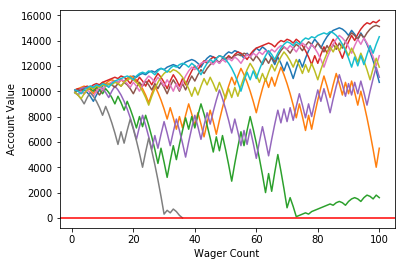

In [11]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

lower_bust = 31.235
higher_profit = 63.208

#lower_bust = 19.00
#higher_profit = 69.00

# back to 1,000
sampleSize = 1
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll <= 50:
        return False
    elif roll >= 51:
        return True




def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    plt.plot(wX,vY)

    if value > funds:
        da_profits+=1



    
da_busts = 0.0
da_profits = 0.0
daSampSize = 10
currentSample = 1


while currentSample <= daSampSize:
    dAlembert(startingFunds,wagerSize,wagerCount)
    currentSample += 1

if ((da_busts/daSampSize)*100.00 < lower_bust) and ((da_profits/daSampSize)*100.00 > higher_profit):
    print('#################################################')
    print('Lower Bust Rate Than:',lower_bust)
    print('Higher profit rate than:',higher_profit)
    print('Bust Rate:',(da_busts/daSampSize)*100.00)
    print('Profit Rate:',(da_profits/daSampSize)*100.00)
    print('#################################################')
    
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

### For return on investment (ROI)

Bust rate is high when wagercount and starting funds are large, profit rate is low, but ROI is also good, not good for casino?

In [41]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

lower_bust = 31.235
higher_profit = 63.208

#lower_bust = 19.00
#higher_profit = 69.00

# back to 1,000
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 100




def rollDice():
    roll = random.randint(1,100)

    if roll <= 50:
        return False
    elif roll >= 51:
        return True


def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    global ROI
    value = funds
    wager = initial_wager
    #wX = []
    #vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)
    ROI += value
    
    if value > funds:
        da_profits+=1
        
    
da_busts = 0.0
da_profits = 0.0
daSampSize = 10000
ROI = 0.0

count = 1


while count <= daSampSize:
    dAlembert(startingFunds,wagerSize,wagerCount)
    count += 1        
    
print('Total Amount Invested:', daSampSize * startingFunds)
print('Total Return:',ROI)
print('ROI:',ROI-(daSampSize * startingFunds))
print('Bust Rate:',(da_busts/daSampSize)*100.00)
print('Profit Rate:',(da_profits/daSampSize)*100.00)

Total Amount Invested: 100000000
Total Return: 101219100
Difference: 1219100
Bust Rate: 17.53
Profit Rate: 65.22


## two variable: wagersize and wagercount

In [52]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time


def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    global Ret
    value = funds
    wager = initial_wager
    #wX = []
    #vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)
    Ret += value
    
    if value > funds:
        da_profits+=1



sampleSize = 100
startingFunds = 10000
x = 0

while x < 3:
    wagerSize = random.uniform(1.0,1000.00)
    wagerCount = random.randint(10,10000)
    
        
    da_busts = 0.0
    da_profits = 0.0
    daSampSize = 10000
    Ret = 0.0

    count = 1


    while count <= daSampSize:
        dAlembert(startingFunds,wagerSize,wagerCount)
        count += 1        
    
    ROI = Ret- (daSampSize * startingFunds)
    totalInvested = daSampSize * startingFunds
    
    percentROI = (ROI/totalInvested)* 100
    
    wagerSizePercent = wagerSize / startingFunds
    
    if percentROI > 0.5:
        print('_____________________________')
        print('wagerSize:',wagerSize)
        print('wagerCount:',wagerCount)
        print('wager size percentage:', wagerSize / startingFunds)
        print('Total Amount Invested:', daSampSize * startingFunds)
        print('Total Return:',ROI)
        print('ROI:',Ret-(daSampSize * startingFunds))
        print('Percent ROI:', percentROI)
        print('Bust Rate:',(da_busts/daSampSize)*100.00)
        print('Profit Rate:',(da_profits/daSampSize)*100.00)
    
    x += 1

_____________________________
wagerSize: 270.08846289603974
wagerCount: 1354
wager size percentage: 0.027008846289603976
Total Amount Invested: 100000000
Total Return: 515597.50067071617
ROI: 515597.50067071617
Percent ROI: 0.5155975006707162
Bust Rate: 91.62
Profit Rate: 8.32
_____________________________
wagerSize: 75.17712755814891
wagerCount: 5790
wager size percentage: 0.007517712755814891
Total Amount Invested: 100000000
Total Return: 2359189.193822071
ROI: 2359189.193822071
Percent ROI: 2.359189193822071
Bust Rate: 93.55
Profit Rate: 6.4399999999999995


# save the same stuff in a file

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time


def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    global Ret
    value = funds
    wager = initial_wager
    #wX = []
    #vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                #wX.append(currentWager)
                #vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                #wX.append(currentWager)
                #vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)
    Ret += value
    
    if value > funds:
        da_profits+=1



sampleSize = 100
startingFunds = 10000
x = 0

while True:
    wagerSize = random.uniform(1.0,1000.00)
    wagerCount = random.randint(10,10000)
    
        
    da_busts = 0.0
    da_profits = 0.0
    daSampSize = 10000
    Ret = 0.0

    count = 1


    while count <= daSampSize:
        dAlembert(startingFunds,wagerSize,wagerCount)
        count += 1        
    
    ROI = Ret- (daSampSize * startingFunds)
    totalInvested = daSampSize * startingFunds
    
    percentROI = (ROI/totalInvested)* 100
    
    wagerSizePercent = wagerSize / startingFunds
    

    if percentROI > 1:
        print '___________________________________________'
        print 'Total invested:',daSampSize*startingFunds
        print 'Total Return:', Ret
        print 'ROI',Ret - (daSampSize*startingFunds)
        print 'Percent ROI:',percentROI
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit rate:',(da_profits/daSampSize)*100.00
        print 'wager size:',wagerSize
        print 'wager count:',wagerCount
        #################### change var
        print 'wager size percentage:',wagerSizePercent

        ### we want to begin saving this stuff...

        ## stuff to save: percentROI,wagerSizePercent,wagerCount

        saveFile = open('/home/tanmingchen/Desktop/jobs/montecarlo/monteCarlo.csv','a')
        saveLine = '\n'+str(percentROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',g'
        saveFile.write(saveLine)
        saveFile.close()
        
    elif percentROI < -1:
        print '___________________________________________'
        print 'Total invested:',daSampSize*startingFunds
        print 'Total Return:', Ret
        print 'ROI',Ret - (daSampSize*startingFunds)
        print 'Percent ROI:',percentROI
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit rate:',(da_profits/daSampSize)*100.00
        print 'wager size:',wagerSize
        print 'wager count:',wagerCount
        #################### change var
        print 'wager size percentage:',wagerSizePercent

        ### we want to begin saving this stuff...

        ## stuff to save: percentROI,wagerSizePercent,wagerCount

        saveFile = open('/home/tanmingchen/Desktop/jobs/montecarlo/monteCarlo.csv','a')
        saveLine = '\n'+str(percentROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',r'
        saveFile.write(saveLine)
        saveFile.close()


## visualisation

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import csv

def graph():
    with open('/home/tanmingchen/Desktop/jobs/montecarlo/monteCarlo.csv','r') as montecarlo:
        datas = csv.reader(montecarlo, delimiter=',')
        for eachLine in datas:
            percentROI = float(eachLine[0])
            wagerSizePercent = float(eachLine[1])
            wagerCount = float(eachLine[2])
            pcolor = eachLine[3]

            plt.scatter(wagerSizePercent,wagerCount,color=pcolor)

    plt.show()
            
graph()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


def graph():
    with open('monteCarloLiberal.csv','r') as montecarlo:
        datas = csv.reader(montecarlo, delimiter=',')

        for eachLine in datas:
            percentROI = float(eachLine[0])
            wagerSizePercent = float(eachLine[1])
            wagerCount = float(eachLine[2])
            pcolor = eachLine[3]

            ax.scatter(wagerSizePercent,wagerCount,percentROI,color=pcolor)

            ax.set_xlabel('wager percent size')
            ax.set_ylabel('wager count')
            ax.set_zlabel('Percent ROI')
            


    plt.show()


graph()

# Labouchere System

10000 10526
Broke Percentage: 5.0


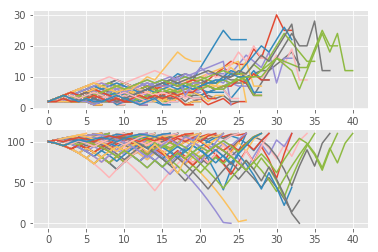

In [59]:
import random
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

broke_count = 0

totalFunded = 0
totalEnding = 0

wins = 0
losses = 0

def Labouchere():
    global broke_count
    global totalFunded
    global totalEnding
    global wins
    global losses

    
    starting_funds = 100

    totalFunded += starting_funds

    
    goal = 10
    system = [1,1,1,1,1,1,1,1,1,1]
    #system = [1,2,2,3,2]

    profit = 0

    current_funds = starting_funds

    wagerSizes = []
    plot_funds = []

    not_broke = True

    wins = 0
    losses = 0

    while profit < goal and not_broke:
        if len(system) > 1:
            size = system[0]+system[-1]
            wagerSizes.append(size)
            plot_funds.append(current_funds)

        else:
            size = system[0]
            wagerSizes.append(size)
            plot_funds.append(current_funds)


        if current_funds <= 0:
            not_broke = False
            broke_count += 1
            losses += 1

        elif current_funds - size <= 0:
            size = current_funds
            not_broke = False
            broke_count += 1

        dice = random.randrange(1,101)

        if dice < 51:
            losses += 1
            system.append(size)
            current_funds -= size
            profit = current_funds - starting_funds

        else:
            wins += 1
            current_funds += size
            profit = current_funds - starting_funds

            if profit != goal:
                try:
                    del system[0]
                    del system[-1]
                except:
                    pass

    wagerSizes.append(size)
    plot_funds.append(current_funds)

    totalEnding += current_funds

    s1.plot(wagerSizes)
    s2.plot(plot_funds)

    


f = plt.figure()
s1 = f.add_subplot(211)
s2 = f.add_subplot(212)

sample_size = 100

for x in range(sample_size):
    Labouchere()

#print("Winners:",wins,"losers:",losses)
print(totalFunded, totalEnding)
print("Broke Percentage:", ((float(broke_count)/sample_size))*100.0)

plt.show()